# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [7]:
# your code here
print('the shape of X is {}'.format(X.shape))
print('the shape of y is {}'.format(y.shape))

the shape of X is (70000, 784)
the shape of y is (70000,)


#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [8]:
# your code here
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

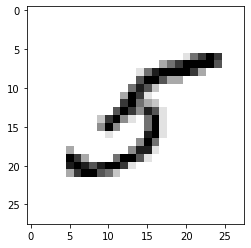

In [9]:
# your code here
import matplotlib.pyplot as plt 
plt.imshow(X[35].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
plt.show()

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [10]:
# your code here
y[35]

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [11]:
# your code here
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]


#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [50]:
import pandas as pd 
data = pd.DataFrame(X)
label = pd.DataFrame(y)

In [68]:
# your code here
#test = label.index[label=='5'].tolist()
#test

label.rename(columns={0:'Number'},inplace=True)
index_5=label.index[label['Number']=='5'].tolist()

X5=data.iloc[index_5,]
y5=label[label.Number=='5']

# all this is useless cool

In [12]:
y_train_5 = np.where(y_train == '5', 1, 0)
y_test_5 = np.where(y_test == '5', 1, 0)

In [13]:
y_test_5.shape

(10000,)

In [94]:
X5.iloc[0,:]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Name: 0, Length: 784, dtype: float64

In [105]:
X5.shape

(6313, 784)

In [14]:
#plt.imshow(np.array(X5.iloc[0,:]).reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
#plt.show()

In [102]:
y5.iloc[0]

Number    5
Name: 0, dtype: object

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [15]:
# your code here
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression().fit(X_train, y_train_5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Does the classifier predict correctly the 35th digit we picked before?

In [16]:
# your code here
pred35 = lr.predict(X_train)
pred35[35]

1

In [122]:
# your comments here
''' yes, it predicted correctly the 35th digit, as a result we have a True '''

In [17]:
y_pred = lr.predict(X_test)

#### The 36000th value is a 9. Check if it was correctly predicted.

In [18]:
# your code here
pred35[36000]

0

In [ ]:
# your comments here
''' yes, it is a False, which means it is not a 5, then it could be a 9 '''

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [19]:
# Libraries
from sklearn.base import BaseEstimator

In [20]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [21]:
# your code here
never = never_5_clf.fit(X, y)
never_pred = never_5_clf.predict(y_test_5)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [22]:
# your code here
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [23]:
# Let´s look at all the results from our first model of Logistic Regression
print('The confusion matrix : \n', confusion_matrix(y_test_5, y_pred))
print('The precission score : ', precision_score(y_test_5, y_pred))
print('The recall score : ', recall_score(y_test_5, y_pred))
print('The f1 score : ', f1_score(y_test_5, y_pred))

The confusion matrix : 
 [[9034   74]
 [ 147  745]]
The precission score :  0.9096459096459096
The recall score :  0.8352017937219731
The f1 score :  0.8708357685563999


In [24]:
# Let´s look at all the results from our dummy model 
print('The confusion matrix : \n', confusion_matrix(y_test_5, never_pred))
print('The precission score : ', precision_score(y_test_5, never_pred))
print('The recall score : ', recall_score(y_test_5, never_pred))
print('The f1 score : ', f1_score(y_test_5, never_pred))

The confusion matrix : 
 [[9108    0]
 [ 892    0]]
The precission score :  0.0
The recall score :  0.0
The f1 score :  0.0
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here
'''
the logistic regression has acceptable scores and confusion matrix, while the never pred thing is as useless as politicians now a days...
'''

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [25]:
# your code here
print('The roc_auc_score : ', roc_auc_score(y_test_5, y_pred))
print('The roc_curve : ', roc_curve(y_test_5, y_pred))


The roc_auc_score :  0.9135385341029717
The roc_curve :  (array([0.        , 0.00812473, 1.        ]), array([0.        , 0.83520179, 1.        ]), array([2, 1, 0]))


In [26]:
a, b, c = roc_curve(y_test_5, y_pred)

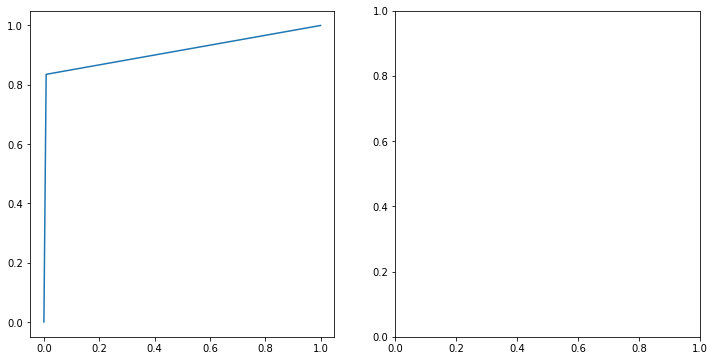

In [28]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(a,b)


#### Now find the roc_auc_score for each. 

In [ ]:
# your code here

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here